<h2 style='color:blue' align='center'>Sports Celebrity Image Classification model<h2>

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread(r'E:\Projects\image classification\images dataset\Shaid_Afridi\images (27).jpg')

*********************************************************

*********************

In [3]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

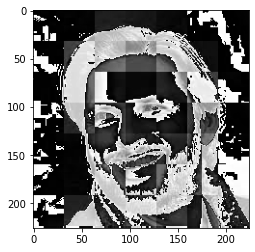

In [4]:
im_har = w2d(img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [5]:
path_to_cr_data ="E:\Projects\image classification\images dataset/cropped/"

In [6]:
import os
cropped_image_dirs= []
for entry in os.scandir(path_to_cr_data):
    if entry.is_dir():
        cropped_image_dirs.append(entry.path)

In [7]:
cropped_image_dirs

['E:\\Projects\\image classification\\images dataset/cropped/Cristiano_Ronaldo',
 'E:\\Projects\\image classification\\images dataset/cropped/Shaid_Afridi',
 'E:\\Projects\\image classification\\images dataset/cropped/virat_kohli']

### Now you should have cropped folder under datasets folder that contains cropped images

### Manually examine cropped folder and delete any unwanted images

In [8]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Cristiano_Ronaldo': ['E:\\Projects\\image classification\\images dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo1.png',
  'E:\\Projects\\image classification\\images dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo10.png',
  'E:\\Projects\\image classification\\images dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo11.png',
  'E:\\Projects\\image classification\\images dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo2.png',
  'E:\\Projects\\image classification\\images dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo3.png',
  'E:\\Projects\\image classification\\images dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo4.png',
  'E:\\Projects\\image classification\\images dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo5.png',
  'E:\\Projects\\image classification\\images dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo6.png',
  'E:\\Projects\\image classification\\images dataset/cropped/Cristiano_Ronaldo\\Cristiano_Ronaldo7.png',
  'E:\\Projects\\image 

In [9]:
len(celebrity_file_names_dict)

3

In [11]:
len(celebrity_file_names_dict['Shaid_Afridi'])

18

In [12]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Cristiano_Ronaldo': 0, 'Shaid_Afridi': 1, 'virat_kohli': 2}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

***for understanding***

In [13]:
X, y = [], []

In [14]:
len(celebrity_file_names_dict.items())

3

In [69]:
# for celebrity_name,training_files in celebrity_file_names_dict.items():
#     for training_image in training_files:
#         print(training_image)    

In [15]:
img = cv2.imread(r'E:\Projects\image classification\images dataset\cropped\Shaid_Afridi\Shaid_Afridi14.png')

In [16]:
scalled_raw_img = cv2.resize(img, (32, 32))

In [17]:
print(scalled_raw_img.shape)

(32, 32, 3)


In [18]:
scalled_raw_img[0]

array([[165, 150, 181],
       [176, 161, 193],
       [169, 155, 185],
       [112, 117, 117],
       [ 62,  62,  60],
       [ 39,  35,  34],
       [ 28,  23,  24],
       [ 33,  29,  35],
       [ 10,   7,  10],
       [  4,   4,   8],
       [  5,  11,  18],
       [  3,  13,  26],
       [  0,  12,  31],
       [ 18,  41,  65],
       [ 59,  86, 114],
       [ 56,  81, 116],
       [ 69,  96, 131],
       [101, 129, 161],
       [112, 144, 176],
       [105, 141, 181],
       [ 85, 120, 160],
       [ 57,  89, 130],
       [ 41,  70, 112],
       [ 40,  66, 105],
       [  8,  21,  42],
       [ 33,  39,  50],
       [ 24,  23,  26],
       [ 31,  34,  35],
       [  4,   8,  15],
       [  7,  11,  16],
       [  9,  12,  16],
       [ 14,  13,  17]], dtype=uint8)

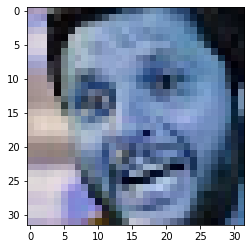

In [19]:
plt.imshow(scalled_raw_img)

In [20]:
img_har = w2d(scalled_raw_img,'db1',5)

In [21]:
img_har.shape

(32, 32)

In [22]:
img_har[0]

array([ 42,  53,  47,   0, 203, 177, 166, 172, 149, 145, 151, 152, 152,
       178, 222, 219, 233,   8,  22,  19, 255, 225, 207, 204, 161, 179,
       165, 174, 149, 151, 153, 155], dtype=uint8)

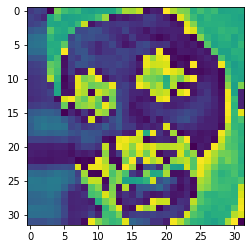

In [23]:
plt.imshow(img_har)

In [24]:
scalled_img_har = cv2.resize(img_har, (32, 32))

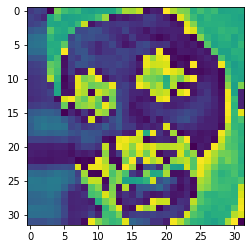

In [25]:
plt.imshow(scalled_img_har)

In [26]:
combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))

In [27]:
combined_img.shape

(4096, 1)

In [28]:
combined_img

array([[165],
       [150],
       [181],
       ...,
       [221],
       [255],
       [  1]], dtype=uint8)

In [29]:
#plt.imshow(combined_img)

In [30]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [31]:
len(X)

77

In [32]:
len(y)

77

In [33]:
len(X[0])

4096

In [34]:
32*32*3 + 32*32

4096

In [35]:
X[0]

array([[ 22],
       [ 12],
       [ 12],
       ...,
       [254],
       [  0],
       [  3]], dtype=uint8)

In [36]:
y[0]

0

In [37]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(77, 4096)

In [39]:
len(X[0])

4096

### Data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned  with heuristic finetuning

In [45]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.85

In [47]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      0.67      0.67         3
           2       0.88      0.93      0.90        15

    accuracy                           0.85        20
   macro avg       0.85      0.70      0.75        20
weighted avg       0.86      0.85      0.84        20



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [48]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [49]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [50]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.842424,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.704545,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.787879,{'logisticregression__C': 1}


In [51]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [52]:
best_estimators['svm'].score(X_test,y_test)

0.85

In [53]:
best_estimators['random_forest'].score(X_test,y_test)

0.6

In [54]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6

In [55]:
best_clf = best_estimators['svm']

### testing

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 2,  0,  0],
       [ 0,  3,  0],
       [ 2,  1, 12]], dtype=int64)

Text(69.0, 0.5, 'Truth')

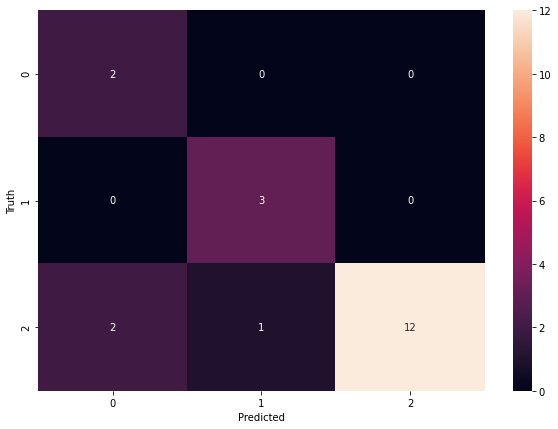

In [57]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
class_dict

{'Cristiano_Ronaldo': 0, 'Shaid_Afridi': 1, 'virat_kohli': 2}

### Save the trained model

In [60]:
#!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'soports_celeberty_classification.pkl') 

['soports_celeberty_classification.pkl']

### Save class dictionary

In [61]:
import json
with open("sopport_celeberty_class_dictionary_.json","w") as f:
    f.write(json.dumps(class_dict))

***using model***

In [63]:
from joblib import load
import numpy as np
model = load('soports_celeberty_classification.pkl')

In [64]:
model.predict(X_test[:5])

array([2, 2, 2, 2, 2])

In [65]:
y_test[:5]

[2, 2, 2, 2, 2]